### Showing the period and DM distribution of MSP samples used in [Liu et al (arxiv: 2312.12185)](https://arxiv.org/abs/2312.12185).

In [1]:
from astropy.io import ascii
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
L15 = ascii.read('L15.txt')
SampleA = ascii.read('SampleA.txt')
SampleB = ascii.read('SampleB.txt')
SampleC = ascii.read('SampleC.txt')

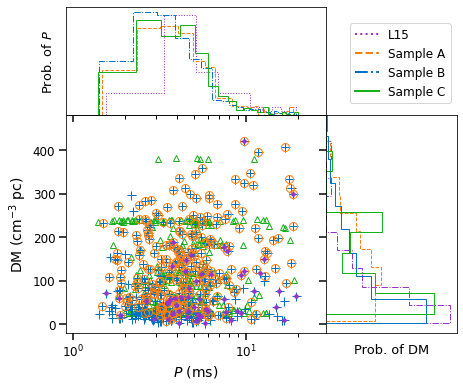

In [3]:
fig3 = plt.figure(constrained_layout=False, figsize=(7, 6))
gs = fig3.add_gridspec(3, 3, wspace=0.0, hspace=0.0)

colors = ['darkorchid', '#ff7f0e', '#0072c1', '#15B01A']

# period - DM plot
ax2 = fig3.add_subplot(gs[1:, :2])
ax2.plot(SampleC['P'], SampleC['DM'], '^', ms=6, fillstyle='none', c=colors[3])
ax2.plot(SampleB['P'], SampleB['DM'], '+', ms=9, fillstyle='none', c=colors[2])
ax2.plot(SampleA['P'], SampleA['DM'], 'o', ms=8, fillstyle='none', c=colors[1])
ax2.plot(L15['P'], L15['DM'], '.', ms=7, c=colors[0])

ax2.set_xscale('log')
ax2.set_xlabel('$P$ (ms)', fontsize=14)
ax2.set_ylabel('DM (cm$^{-3}~$pc)', fontsize=14)
ax2.tick_params('both', length=7, width=1.5, which='major')
ax2.tick_params('both', length=4, width=1, which='minor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0.91, 29)
plt.ylim(-20, 480)

# period histogram

ax1 = fig3.add_subplot(gs[:1, :2])
ax1.hist(L15['P'],  histtype='step', ls=':', density=1, color=colors[0])
ax1.hist(SampleA['P'], histtype='step', ls='--', bins=20, density=1, color=colors[1])
ax1.hist(SampleB['P'], histtype='step', ls='-.', bins=22, density=1, color=colors[2])
ax1.hist(SampleC['P'], histtype='step', ls='-', bins=20, density=1, color=colors[3])

ax1.set_xscale('log')
plt.gca().xaxis.set_ticklabels([])
ax1.set_ylabel('Prob. of $P$', fontsize=13)
ax1.set_yticks([])
ax1.set_xlim(0.91, 29)
ax1.tick_params('both', length=7, width=1.5, which='major')
ax1.tick_params('both', length=4, width=1, which='minor')

# DM histogram

ax3 = fig3.add_subplot(gs[1:, 2])
ax3.hist(L15['DM'],  histtype='step', ls='-.', orientation='horizontal', density=1, color=colors[0])
ax3.hist(SampleA['DM'], histtype='step', ls='--', orientation='horizontal', density=1, color=colors[1])
ax3.hist(SampleB['DM'], histtype='step', orientation='horizontal', density=1, color=colors[2])
ax3.hist(SampleC['DM'], histtype='step', orientation='horizontal', density=1, color=colors[3])

plt.xticks([])
ax3.set_xticks([])
ax3.set_ylim(-20, 480)
plt.gca().yaxis.set_ticklabels([])
ax3.set_xlabel('Prob. of DM', fontsize=13)
ax3.tick_params('both', length=7, width=1.5, which='major')

# legend panel

ax4 = fig3.add_subplot(gs[0, 2])
name = ['L15', 'Sample A', 'Sample B', 'Sample C']
L15_line = mlines.Line2D([], [], color=colors[0], lw=2, ls=':', label=name[0])
SA_line = mlines.Line2D([], [], color=colors[1], lw=2, ls='--', label=name[1])
SB_line = mlines.Line2D([], [], color=colors[2], ls='-.', lw=2, label=name[2])
SC_line = mlines.Line2D([], [], color=colors[3], lw=2, label=name[3])

ax4.legend(handles=[L15_line, SA_line, SB_line, SC_line], bbox_to_anchor=(1., .9),
           loc='upper right',fontsize=12)
ax4.axis('off')
plt.show()